### Esercizio 10.2

Ho parallelizzato con le librerie MPI il GA per risolvere il problema del TSP nel caso di 32 città posizionate casualmente all'interno di un quadrato. Ho utilizzato 4 nodi che rappresentano i 4 continenti. L'idea è quella di eseguire in parallelo 4 algoritmi genetici diversi e periodicamente ogni $N_{migr}$ generazioni scambiare la parte migliore delle popolazioni dei nodi in modo randomico.

### Procedimento
1. Ho inizializzato MPI con i 4 nodi, ognuno dei quali procede in modo indipendente, è essenziale che i 4 processi siano effettivamente diversi: ognuno deve effettuare una ricerca del miglior percorso differente. Il generatore di numeri Random deve quindi produrre sequenze casuali differenti per ogni processo. Per fare questo sfruttando il file "Primes" ho fatto in modo che ognuno dei processi avesse i due numeri primi, utilizzati per generare la sequenza, diversi. Così facendo per ogni nodo l'algoritmo genetico evolve in modo differente.


2. Ogni $N_{migr}$ generazioni i nodi devono comunicare in modo casuale. La scelta dei due nodi che si scambiano l' informazione deve essere comune a tutti i processi, è quindi necessario anche un generatore Random globale.


3. Scelti casualmente quali nodi comunicano, utilizzando MPI_Send( ) e MPI_Recv( ) entrambe funzioni bloccanti, ho scambiato tutte le grandezze necessarie della prima metà della popolazione:
    - I percorsi
    - Le lunghezze dei percorsi
    - Fitness di ogni percorso
    - E la bool "check" che controlla che il percorso rispetti i limiti del TSP.

   

Ho eseguito il TSP con GA in parallelo utilizzando le stesse città dell'esercitazione nove e ho confrontato le due performance. In particolare ho cercato il set di parametri:
- Grandezza delle popolazioni $N_{ind}$
- Numero di generazioni $N_{gen}$
- $N_{migr}$

Che minimizzasse il tempo del processo e desse il risultato esatto.

Nel caso semplice i parametri sono che ho scelto sono i seguenti:


$$
N_{ind}=600 \hspace{1cm}
N_{gen}=1300
$$


Nel caso parallelo invece:

$$
N_{ind}=200 \hspace{1cm}
N_{gen}=3500\hspace{1cm}
N_{migr}=500
$$


    
I parametri per l'evoluzione dell' algortimo genetico sono rimasti gli stessi della lezione 9.
   
Non è stato facile quantificare il miglioramento della performance, questo perchè sono andato a tentativi nella scelta dei parametri, probabilmente c'è un set di parametri che converge ugualmente, ma con un tempo minore che non ho trovato.

Scelti i parametri, ho utilizzato la funzione MPI_Wtime( ) per misurare il tempo di ogni processo:  

$$
t_1=5.45 \hspace{1mm}min \hspace{0.5cm} 
t_2=5.46 \hspace{1mm}min \hspace{0.5cm} 
t_3=5.47 \hspace{1mm}min \hspace{0.5cm} 
t_4=5.48 \hspace{1mm}min
$$


Un tempo inferiore rispetto al caso non parallelo che con i parametri sopra indicati ha tempo di processo pari a 

$$ 
t= 9.3 \hspace{1mm} min 
$$

Riporto i percorsi trovati da entrambi i metodi che come si vede dai grafici che seguono arrivano allo stesso risultato in tempi diversi.

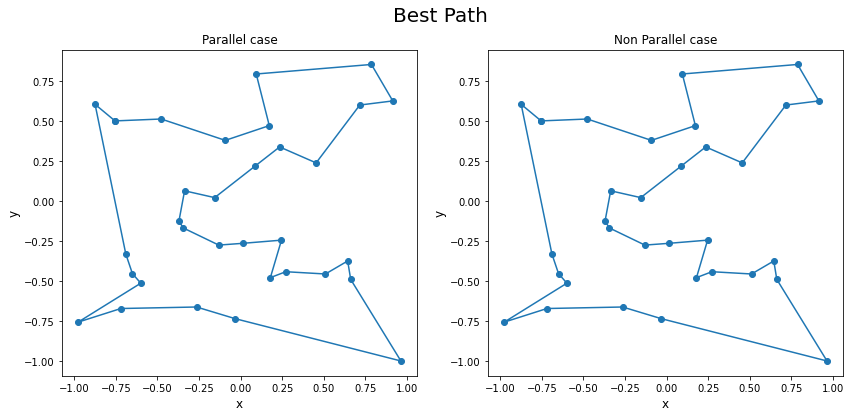

In [1]:
import numpy as np
import matplotlib.pyplot as plt

with open("BestPathNoParall.0") as BestPathNoPar:
	BPN=np.loadtxt(BestPathNoPar,usecols=(0,1,2),dtype=float)

with open("BestPathParall.0") as BestPathPar:
	BPP=np.loadtxt(BestPathPar,usecols=(0,1,2),dtype=float)
    
    
fig=plt.figure(figsize=(14,6))
fig.suptitle("Best Path", fontsize=20)
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

ax1.plot(BPP[:,0],BPP[:,1])
ax1.scatter(BPP[:,0],BPP[:,1])
ax1.set_title("Parallel case")

ax2.plot(BPN[:,0],BPN[:,1])
ax2.scatter(BPN[:,0],BPN[:,1])
ax2.set_title("Non Parallel case")

ax1.set_xlabel("x",fontsize=12)
ax2.set_xlabel("x",fontsize=12)

ax1.set_ylabel("y",fontsize=12)
ax2.set_ylabel("y",fontsize=12)

plt.show()